Partial Hash Inversion

<a href="https://colab.research.google.com/github/btclib-org/bbt/ipynb/blob/master/PartialHashInversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!/usr/bin/env python3

# Copyright (C) 2017-2020 The btclib developers
#
# This file is part of btclib. It is subject to the license terms in the
# LICENSE file found in the top-level directory of this distribution.
#
# No part of btclib including this file, may be copied, modified, propagated,
# or distributed except according to the terms contained in the LICENSE file.

import hashlib
import time
from typing import List

msg = input('insert string (return for "Hello, world!"): ')
if msg == "": msg = "Hello, world!"

zerostr = input('number of required zeros (return for 4 zeros): ')
if zerostr == "":
    zeros = 4
else:
    zeros = int(zerostr)
assert zeros > 0, "the number of zeros to look for must be greater than zero"

print(f"\nstring is: {msg}")
print(f"{zeros} required zeros")

# n[i] is used to count the results starting with i+1 zeros
n: List[int] = []
maxEval = pow(16, zeros+1)
i = j = nonce = 0
start = time.time()
while i < maxEval and nonce == 0:
    string = msg+str(i)
    hashValue = hashlib.sha256(string.encode()).hexdigest()
    while hashValue[j] == "0":
        if j < len(n):
            n[j] += 1
        else:
            n.append(1)
            elapsed = time.time() - start
            report = f"{j+1} zeros found {n}"
            if 0 < elapsed <= 600:
                report += f" in {round(elapsed)} seconds at {round(i/elapsed)} hash/s"
            elif 600 < elapsed <= 36000:
                report += f" in {round(elapsed/60)} minutes at {round(i/elapsed)} hash/s"
            elif 36000 < elapsed:
                report += f" in {round(elapsed/3600)} hours at {round(i/elapsed)} hash/s"
            print(report)
            if j == zeros-1:
                nonce = i
        j += 1
    j = 0
    i += 1

if n[zeros-1] == 1:
    print("nonce:", nonce)
    print(string)
    print(hashValue)
else:
    print("nonce not found")


insert string (return for "Hello, world!"): paolomazzocchi
number of required zeros (return for 4 zeros): 7

string is: paolomazzocchi
7 required zeros
1 zeros found [1] in 0 seconds at 32264 hash/s
2 zeros found [24, 1] in 0 seconds at 345782 hash/s
3 zeros found [112, 6, 1] in 0 seconds at 555206 hash/s
4 zeros found [9415, 572, 30, 1] in 0 seconds at 632469 hash/s
5 zeros found [38724, 2469, 149, 5, 1] in 1 seconds at 663948 hash/s
6 zeros found [38724, 2469, 149, 5, 1, 1] in 1 seconds at 663758 hash/s
7 zeros found [15326843, 955891, 59630, 3753, 243, 23, 1] in 356 seconds at 689897 hash/s
nonce: 245265994
paolomazzocchi245265994
000000057cf2a14ebf763265566f53cbf624338765df1ea1708376ce59e927e8


Now plot the result in a bar chart

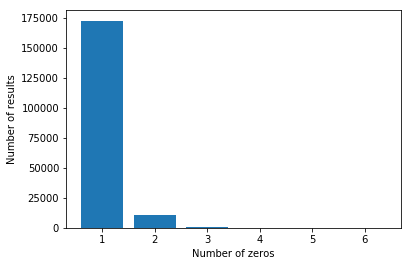

In [0]:
import matplotlib.pyplot as plt

x = []
i=1
for i in range(zeros):
    x.append(i+1)

plt.bar(x, n)
plt.xlabel('Number of zeros')
plt.ylabel('Number of results')
plt.show()


It is better to use a logarithmic scale for Y axis

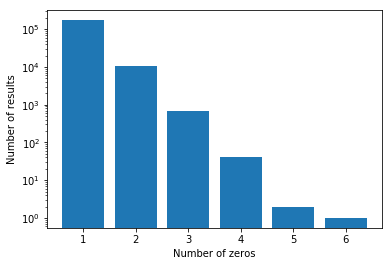

In [0]:
plt.bar(x, n, log='true')
plt.xlabel('Number of zeros')
plt.ylabel('Number of results')
plt.show()